In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Mispriced-Diamonds.csv')
data.head()

,carat,clarity,price
0,0.23,SI2,326
1,0.21,SI1,326
2,0.23,VS1,327
3,0.29,VS2,334
4,0.31,SI2,335


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 3 columns):
carat      53940 non-null float64
clarity    53940 non-null object
price      53940 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.0+ MB


In [4]:
data = data[data['carat']<2.5]
IF_data=data[data['clarity']=='IF']
VVS1_data=data[data['clarity']=='VVS1']
VVS2_data=data[data['clarity']=='VVS2']
VS1_data=data[data['clarity']=='VS1']
VS2_data=data[data['clarity']=='VS2']
SI1_data=data[data['clarity']=='SI1']
SI2_data=data[data['clarity']=='SI2']
I1_data=data[data['clarity']=='I1']


IF_data.head()

,carat,clarity,price
229,0.52,IF,2783
250,0.55,IF,2789
256,0.64,IF,2790
281,0.72,IF,2795
304,0.60,IF,2800


In [5]:
IF_carat = IF_data.groupby('carat', as_index = False).mean()
VVS1_carat = VVS1_data.groupby('carat', as_index = False).mean()
VVS2_carat = VVS2_data.groupby('carat', as_index = False).mean()
VS1_carat = VS1_data.groupby('carat', as_index = False).mean()
VS2_carat = VS2_data.groupby('carat', as_index = False).mean()
SI1_carat = SI1_data.groupby('carat', as_index = False).mean()
SI2_carat = SI2_data.groupby('carat', as_index = False).mean()
I1_carat = I1_data.groupby('carat', as_index = False).mean()
IF_carat.head()

,carat,price
0,0.23,497.714286
1,0.24,566.500000
2,0.25,599.833333
3,0.26,612.769231
4,0.27,685.117647


c:\python3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


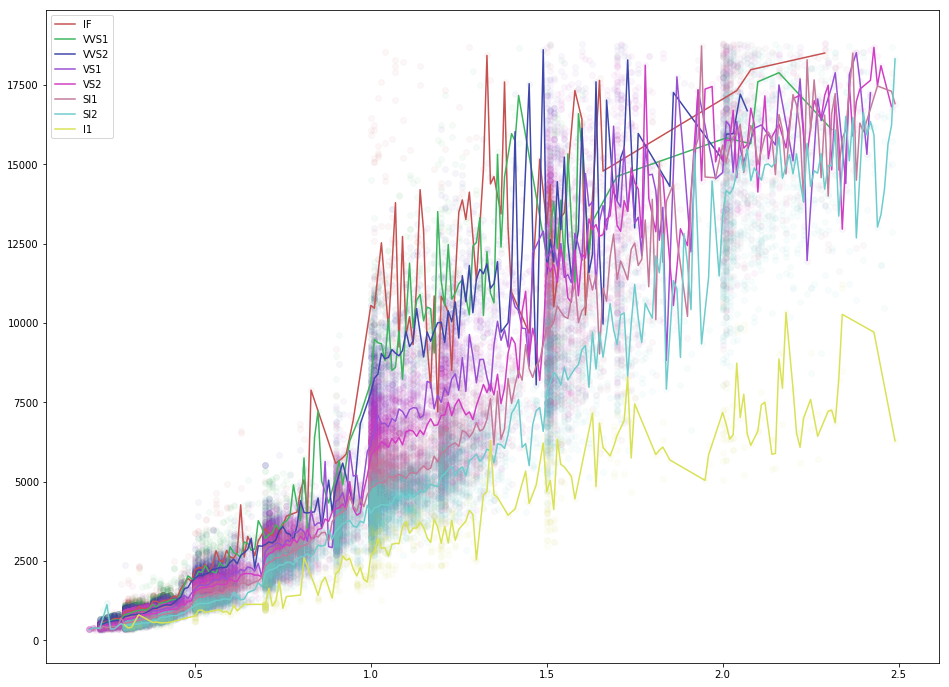

In [12]:
#Crear figura y subgraficas
plt.figure(1, figsize=(16, 12))
IF = plt.subplot()
VVS1 = plt.subplot()
VVS2 = plt.subplot()
VS1 = plt.subplot()
VS2 = plt.subplot()
SI1 = plt.subplot()
SI2 = plt.subplot()
I1 = plt.subplot()

IF_line = plt.subplot()
VVS1_line = plt.subplot()
VVS2_line = plt.subplot()
VS1_line = plt.subplot()
VS2_line = plt.subplot()
SI1_line = plt.subplot()
SI2_line = plt.subplot()
I1_line = plt.subplot()
#plt.xaxis()

#Crear graficas scatter
IF.scatter(IF_data['carat'], IF_data['price'], linewidth =0.5, alpha = 0.05, color="#c65151", label = None)
VVS1.scatter(VVS1_data['carat'], VVS1_data['price'], linewidth =0.5, alpha = 0.05, color="#3db55f", label = None)
VVS2.scatter(VVS2_data['carat'], VVS2_data['price'], linewidth =0.5, alpha = 0.05, color="#4047aa", label = None)
VS1.scatter(VS1_data['carat'], VS1_data['price'], linewidth =0.5, alpha = 0.05, color="#9a50d3", label = None)
VS2.scatter(VS2_data['carat'], VS2_data['price'], linewidth =0.5, alpha = 0.05, color="#d13ec4", label = None)
SI1.scatter(SI1_data['carat'], SI1_data['price'], linewidth =0.5, alpha = 0.05, color="#c47b9c", label = None)
SI2.scatter(SI2_data['carat'], SI2_data['price'], linewidth =0.5, alpha = 0.05, color="#6ecccc", label = None)
I1.scatter(I1_data['carat'], I1_data['price'], linewidth =0.5, alpha = 0.05, color="#d9e256", label = None)

#Crear graficas de linea
IF_line.plot(IF_carat['carat'], IF_carat['price'], color="#c65151", label = "IF")
VVS1_line.plot(VVS1_carat['carat'], VVS1_carat['price'], color="#3db55f", label = "VVS1")
VVS2_line.plot(VVS2_carat['carat'], VVS2_carat['price'], color="#4047aa", label = "VVS2")
VS1_line.plot(VS1_carat['carat'], VS1_carat['price'], color="#9a50d3", label = "VS1")
VS2_line.plot(VS2_carat['carat'], VS2_carat['price'], color="#d13ec4", label = "VS2")
SI1_line.plot(SI1_carat['carat'], SI1_carat['price'], color="#c47b9c", label = "SI1")
SI2_line.plot(SI2_carat['carat'], SI2_carat['price'], color="#6ecccc", label = "SI2")
I1_line.plot(I1_carat['carat'], I1_carat['price'], color="#d9e256", label = "I1")

plt.legend()

In [21]:
IF_value = (IF_carat['price']/IF_carat['carat']).mean()
VVS1_value = (VVS1_carat['price']/VVS1_carat['carat']).mean()
VVS2_value = (VVS2_carat['price']/VVS2_carat['carat']).mean()
VS1_value = (VS1_carat['price']/VS1_carat['carat']).mean()
VS2_value = (VS2_carat['price']/VS2_carat['carat']).mean()
SI1_value = (SI1_carat['price']/SI1_carat['carat']).mean()
SI2_value = (SI2_carat['price']/SI2_carat['carat']).mean()
I1_value = (I1_carat['price']/I1_carat['carat']).mean()

print('IF = ' + str(IF_value))
print('VVS1 = ' + str(VVS1_value))
print('VVS2 = ' + str(VVS2_value))
print('VS1 = ' + str(VS1_value))
print('VS2 = ' + str(VS2_value))
print('SI1 = ' + str(SI1_value))
print('SI2 = ' + str(SI2_value))
print('I1 = ' + str(I1_value))

IF = 6716.646656071293
VVS1 = 6404.914251020539
VVS2 = 6245.705765815477
VS1 = 5737.03126943608
VS2 = 5520.403644812313
SI1 = 5100.82593042837
SI2 = 4538.984947735884
I1 = 2832.260924281442
